<a href="https://colab.research.google.com/github/VIVEK818713/Data_Gatrhring/blob/main/1_data_gathering_technique.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gathering the data---fetch the data and convert into your desired format .
### 1. csv
### 2. API
### 3. web scraping
### 4. database
### 5. github
### 6. other's google drive

In [ ]:
import pandas as pd
import numpy as np

## open csv file from local storage
## pd.read_csv('csv location with .csv extention')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/0machine learning/csv data/aug_train.csv')
df.head()

## Getting data from a url
## if you have a url where your data is , then you can use below code.

In [ ]:
import requests
from io import StringIO

url = "https://raw.githubusercontent.com/cs109/2014_data/master/countries.csv"
headers = {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10.14; rv:66.0) Gecko/20100101 Firefox/66.0"}
req = requests.get(url, headers=headers)
data = StringIO(req.text)

pd.read_csv(data)

# Get the data from KAGGLE

## steps for the first time using Kaggle for getting the dataset
## first goto the kaggle.com
## sign in with your gmail or other account
## click on account (on the left corner click)
## scroll and reach at the API tab and click on 'create new API Token'
## kaggle.json file will be downloded
## After this step upload this kaggle.json into your colab environment.and copy the path.
## import os module
##os.environ['KAGGLE_CONFIG_DIR']='file path only don't write filename means kaggle.json'
## after that search your data set on kaggle and copy API command
## you can follow the below code for move on.

In [ ]:
import pandas as pd
import os

In [ ]:
os.environ['KAGGLE_CONFIG_DIR']='/content/drive/MyDrive/Colab Notebooks/Kaggle json'

In [ ]:
# copy API command from kaggle and paste with using ! sign
!kaggle datasets download -d hesh97/titanicdataset-traincsv

In [ ]:
! unzip /content/titanicdataset-traincsv.zip

In [ ]:
df=pd.read_csv('/content/train.csv')
df.head()

# Read a Json File

## Please check the json file on --
##kaggle datasets download -d kaggle/recipe-ingredients-dataset

In [ ]:
import pandas as pd
import os

In [ ]:
os.environ['KAGGLE_CONFIG_DIR']='/content/drive/MyDrive/Colab Notebooks/Kaggle json'

In [ ]:
!kaggle datasets download -d kaggle/recipe-ingredients-dataset

In [ ]:
!unzip /content/recipe-ingredients-dataset.zip

In [ ]:
df=pd.read_json('/content/train.json')
df.head()

# read file from api
## https://api.exchangerate-api.com/v4/latest/INR

In [ ]:
df=pd.read_json('https://api.exchangerate-api.com/v4/latest/INR')
df.head()

# Getting data using web scrapping
## install important library

In [ ]:
!pip install BeautifulSoup4
!pip install lxml

## Now import libarary

# Getting data through web scrapping
##Get the web page and find a table we want to scrape, which means figuring out the table and web page we want to scrape.
## https://en.wikipedia.org/wiki/List_of_countries_by_cancer_rate
##Like most data science projects, the first step is to import the tools (libraries) necessary.

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

##Step 2 of web scraping is a GET request. But, before we get a request, we have to save the URL of the webpage with a name. 
## Here, we saved it as a base_site. On a web server, we mostly communicate through HTTP requests. GET is one of the most popular request types. Our get request is saved in r, which actually represents the response. 

In [ ]:
base_site='https://en.wikipedia.org/wiki/List_of_countries_by_cancer_rate'
r=requests.get(base_site)

In [ ]:
r

##If you get a response code 200, like above, that means the operation was successful. If you get 404, that means that the page was not found.

##Step 3
##The next step is to obtain HTML from the response (r).

In [ ]:
html=r.content

##Step 4
##In this step, we will call a beautiful soup function to extract the data from the HTML document. LXML will be used to parse the HTML file. Extracted data will be saved in the soup variable as assigned. 

In [ ]:
soup=BeautifulSoup(html,'lxml')

##Step 5 is basically data exploration using a beautiful soup function.

In [ ]:
soup

##Step 6 
##.find() and .find_all() methods are the most popular methods to explore a newly created soup. They can be used in a variety of ways. Note that .find() gives only the first result from a line from a query, while .find_all() is used to extract all the queries from the page.



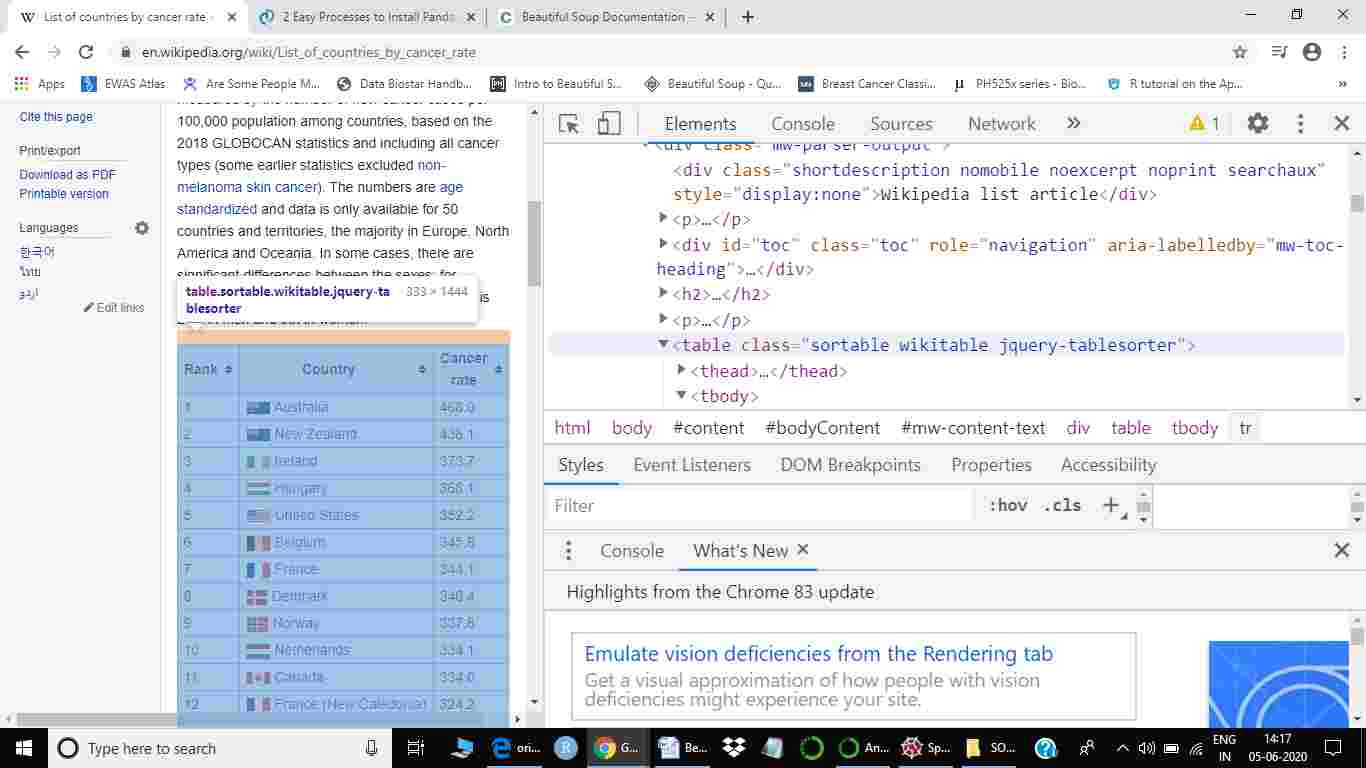

##In this step, we are using the .find() function to extract the table. The class of the table we are scraping is the sortable wikitable, as this information is obtained from the HTML file above.

In [ ]:
cancer_table=soup.find('table',{'class':'sortable wikitable'})

In [ ]:
cancer_table

##Step 7
##If you look at the Wikipedia page again, you can see that countries in the "Country" column are actually links. We can also confirm it using anchors:

In [ ]:
links=cancer_table.find('a')

In [ ]:
links

##Here ‘a’ represents anchor and ‘href’ suggests there is a link. However, as I have used the .find() method, we are seeing only the first link. To extract all links, we will use .find_all() method. 

In [ ]:
links=cancer_table.find_all('a')
links

##Now we can see the links for all countries. The next step is to create a list of all countries. Hence, we will use a ‘for’ a loop. Get function will be used to retrieve specific information, here using the title (title = country name). 

In [ ]:
countries=[]
for link in links:
  countries.append(link.get('title'))
print(countries)

##Now, our list containing country names as elements are ready.

##Step 7.1
##This step is again part of step 7, as we are going to extract the Cancer rate column. Earlier, I had called the .find() method to create our table. Now we will use .find_all() method.

In [ ]:
table=soup.find_all('table')
table

##As we can see, there are different tags inside a table.

##th = Table heading
##tr = Table row
##td = Table data cell
##After exploring the ‘table’, we are sure that the first table is the table which we are going to scrape. Hence we will use index[0] to retrieve it.

##**Reminder:** there might be more than one table. Hence, it is important to figure out the item number of the relevant table. Otherwise, the wrong indexing will produce the wrong results.



In [ ]:
table=soup.find_all('table')[0]
table

##Now the table contains all the required information for table 1 (List of countries by cancer rate). The next step is to check the first row of the table using index[0]. Mostly the first row of a table is a header name.

In [ ]:
table.find_all('tr')[0].contents

##From here, we can see that the Cancer rate is the 6th element. Indexing in python starts from 0, hence we will use the 5th index to extract information from the Cancer rate column.

In [ ]:
rates=[]
for row in table.find_all('tr'):
  
  rates.append(row.contents[5].text)
rates

In [ ]:
rates=[]
for row in table.find_all('tr'):  
  rates.append(row.contents[5].text.strip('\n')) 
rates

In [ ]:
rates=[]
for row in table.find_all('tr'):
  rates.append(row.contents[5].text.strip('\n'))
rates=rates[1:]
rates

In [ ]:
rates=[float(i) for i in rates]
rates

##A loop was used to extract information from all elements. .strip() function was used to strip '\n' from each element. The first element was the column name, hence we excluded the first element to match it with the country list. The obtained data is a string here, rather than float.

##The next step is to convert the string into the float.

##Here, we called the float method to convert strings into the float. As there are many elements in the rate list, hence a ‘for’ loop was called to convert all elements into the float.

##Now our both lists are ready. The next step is to merge these lists together and convert them into a data frame. We are now done with beautiful soup. From here onwards, we will use the panda's library to convert lists into a data frame

In [ ]:
df=pd.DataFrame(list(zip(countries,rates)),columns=['countries','cancer rate'])
df.head()

##In this step, we first zipped our both lists and then converted it into a data frame using pandas. We also assigned the column names here. The whole data is saved in a df variable. Our newly created data frame is ranked by cancer rate, hence I did not add that specific row. Please do not confuse with indexing. 

##The next step is to save our data frame as an excel, as a CSV or as a text file. We can do any analysis as required using a newly created data frame. However, it is always a good idea to save the final cleaned file, as we may have to provide it to someone.



In [ ]:
df.to_csv('countries cancer rate.csv',index=False,header=True)

# web scrapping of IMDB website

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

## please visit the site first--https://www.imdb.com/chart/top/?ref_=nv_mv_250

## here we want to extract title name , year , and rating from the site for this we are going to construct 3 empty list as below

In [ ]:
TitleName=[]
Year=[]
Rating=[]

## now send the request to the site by using request () with url

In [ ]:
url = "https://www.imdb.com/chart/top/?ref_=nv_mv_250"
r = requests.get(url)

##If you get a response code 200, like above, that means the operation was successful.

In [ ]:
r

## check the content

In [ ]:
r=r.content

In [ ]:
r

##we will call a beautiful soup function to extract the data from the HTML document. html will be used to parse the HTML file. Extracted data will be saved in the soup variable as assigned. 

In [ ]:
soup = BeautifulSoup(r, "html.parser")

In [ ]:
soup

In [ ]:
list = soup.find("tbody", {"class":"lister-list"}).find_all("tr")

In [ ]:
for i in list:
  title = i.find("td",{"class":"titleColumn"})
  TitleName.append(title.text)
  year = i.find("span",{"class":"secondaryInfo"})
  Year.append(year.text)
  rating = i.find("td",{"class":"ratingColumn imdbRating"})
  Rating.append(rating.text)

In [ ]:
df=pd.DataFrame({'Title' : TitleName,'year':Year,'Rating':Rating})

In [ ]:
df.head()

In [ ]:
df.to_csv('IMDbRating.csv', index=False, encoding='utf-8')

# Getting file from drive
## First get the drive and location where the file is stored
## right click on the file and clcik on 'Get Link'
## check the restriction part and allow as you desired. i used 'anyone with this link option'
## then click on 'copy link'
## and store it in a variable like below

In [ ]:
data_path="https://drive.google.com/file/d/1-4r0z1QMKt9WJ-Xo0T9-4-88i2y-kv9K/view?usp=sharing"


## file/d/  delete
## uc?export=download&id=        
## paste inplace of file/d/
## and remove /view?usp=sharing from the last

In [ ]:
data_path="https://drive.google.com/uc?export=download&id=1-4r0z1QMKt9WJ-Xo0T9-4-88i2y-kv9K"


In [ ]:
df=pd.read_csv(data_path)

In [ ]:
df.head()